In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['font.size']=20

<Container object of 3 artists>

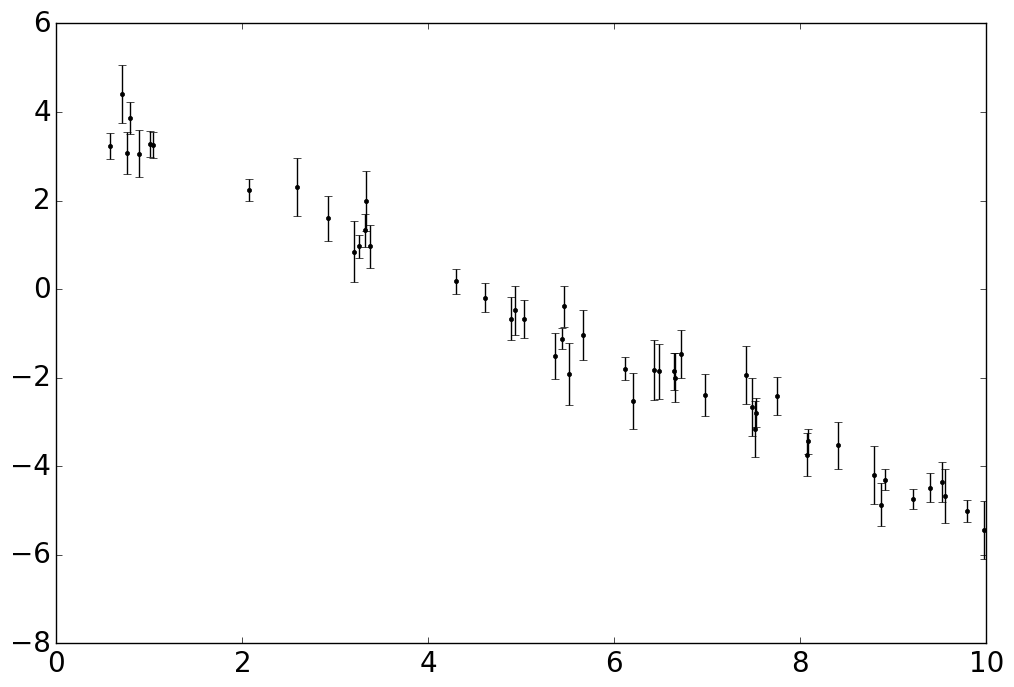

In [2]:

# Generate synthetic data from a model.
# For simplicity, let us assume a LINEAR model y = m*x + b
# where we want to fit m and b
m_true = -0.9594
b_true = 4.294
N = 50

x = np.sort(10*np.random.rand(N))
yerr = 0.2 + 0.5*np.random.rand(N)
y = m_true*x + b_true
y += yerr * np.random.randn(N)

fig = plt.figure()
fig.set_size_inches(12, 8)
plt.errorbar(x, y, yerr=yerr, fmt='.k')

In [3]:

# Now, let's setup some parameters that define the MCMC
ndim = 2
nwalkers = 500

# Initialize the chain
# Choice 1: chain uniformly distributed in the range of the parameters
pos_min = np.array([-5., 0.])
pos_max = np.array([5., 10.])
psize = pos_max - pos_min
pos = [pos_min + psize*np.random.rand(ndim) for i in range(nwalkers)]

# Visualize the initialization

In [4]:
# Define the posterior PDF
# Reminder: post_pdf(theta, data) = likelihood(data, theta) * prior_pdf(theta)
# We take the logarithm since emcee needs it.

# As prior, we assume an 'uniform' prior (i.e. constant prob. density)
def lnprior(theta):
    m, b = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0:
        return 0.0
    return -np.inf

# As likelihood, we assume the chi-square. Note: we do not even need to normalize it.
def lnlike(theta, x, y, yerr):
    m, b = theta
    model = m * x + b
    return -0.5*(np.sum( ((y-model)/yerr)**2. ))

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [5]:
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim,
                                lnprob, args=(x, y, yerr))

In [6]:
import time
time0 = time.time()
# burnin phase
pos, prob, state  = sampler.run_mcmc(pos, 300)
sampler.reset()
time1=time.time()
print time1-time0

/usr/local/lib/python2.7/dist-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/usr/local/lib/python2.7/dist-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


1.85134911537


In [7]:
time0 = time.time()
# perform MCMC
pos, prob, state  = sampler.run_mcmc(pos, 700)
time1=time.time()
print time1-time0

samples = sampler.flatchain
samples.shape

4.41677498817


(350000, 2)

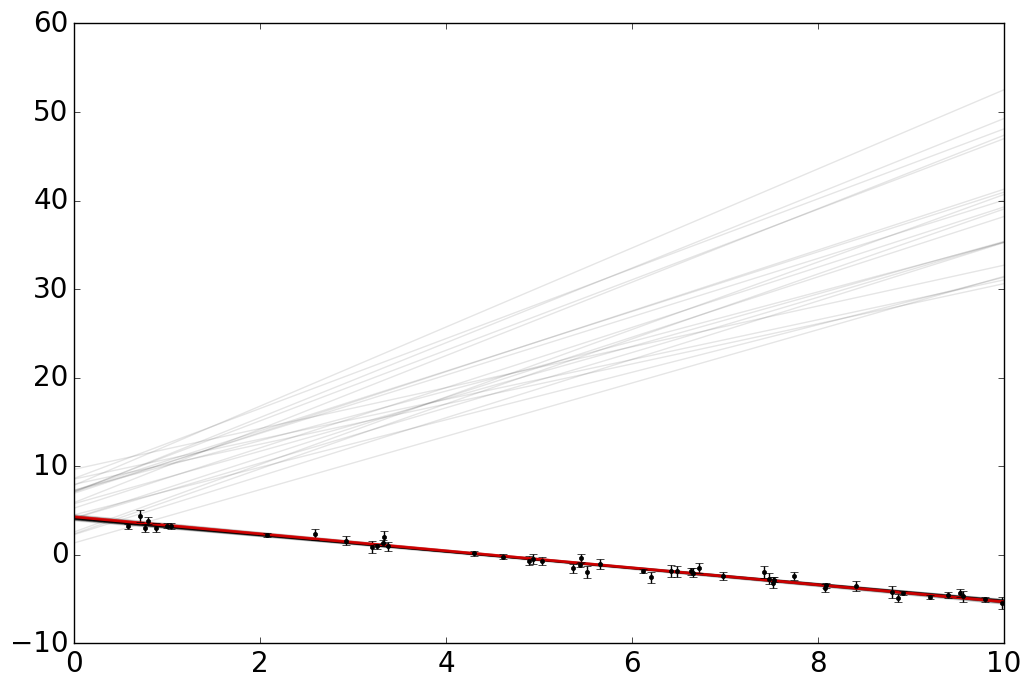

In [8]:

# Plot back the results in the space of data
fig = plt.figure()

xl = np.array([0, 10])
for m, b in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(xl, m*xl+b, color="k", alpha=0.1)
plt.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
plt.errorbar(x, y, yerr=yerr, fmt=".k")
fig.set_size_inches(12, 8)

(-6, 6)

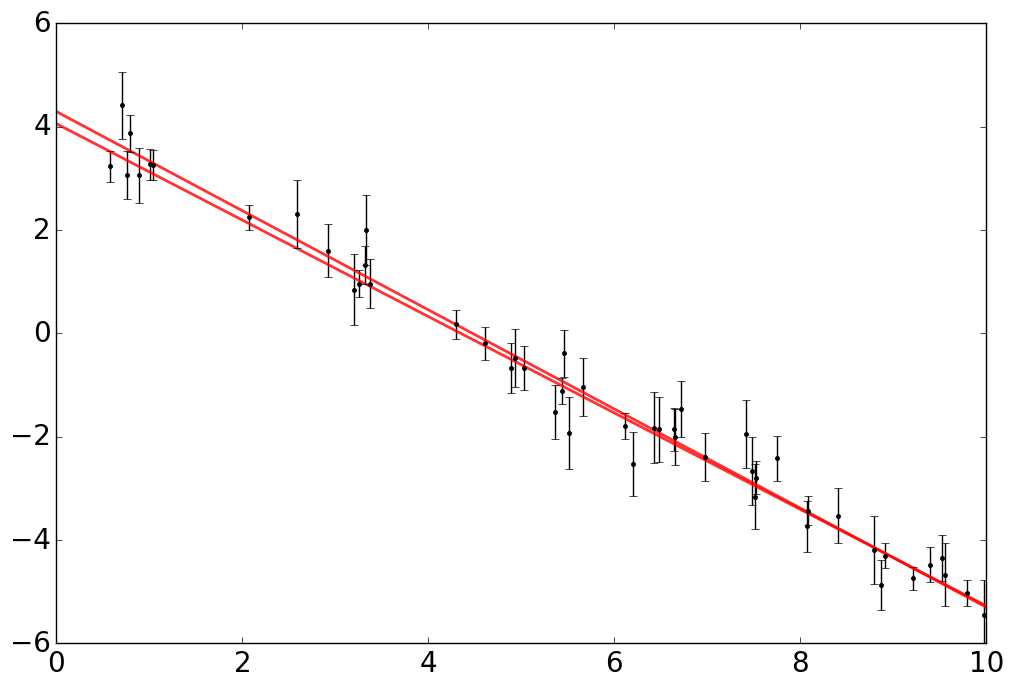

In [11]:

# Plot back the results in the space of data
fig = plt.figure()

xl = np.array([0, 10])
#for m, b in samples[-100:]: # samples[np.random.randint(len(samples[-100), size=100)]:
#    plt.plot(xl, m*xl+b, color="k", alpha=0.1)
plt.plot(xl, samples[-1][0]*xl+samples[-1][1], color="r", lw=2, alpha=0.8)
plt.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
plt.errorbar(x, y, yerr=yerr, fmt=".k")
fig.set_size_inches(12, 8)
plt.ylim(-6,6)